PART 1: DATA

Read in the data and answer the following questions related to it:




In [1]:
from google.colab import drive
drive.mount("./drive", force_remount= True)

path_prefix = "./drive/My Drive/BIO310"

Mounted at ./drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

%matplotlib inline

In [3]:
fname = "data.csv"
df = pd.read_csv(join(path_prefix, fname))
df.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,...,gene_20491,gene_20492,gene_20493,gene_20494,gene_20495,gene_20496,gene_20497,gene_20498,gene_20499,gene_20500,gene_20501,gene_20502,gene_20503,gene_20504,gene_20505,gene_20506,gene_20507,gene_20508,gene_20509,gene_20510,gene_20511,gene_20512,gene_20513,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,0.591871,1.334282,2.015391,0.591871,0.0,0.0,0.0,0.0,0.591871,5.619994,1.334282,0.000000,9.796088,0.0,0.000000,1.598651,7.215116,10.839070,6.620204,9.513538,0.0,4.063658,7.764805,4.747656,13.714396,10.034496,0.000000,0.0,9.833458,...,9.370304,10.362393,5.589928,8.141964,0.000000,2.736583,7.037152,7.123480,10.967399,5.902800,3.719370,7.203554,6.042557,2.602077,7.425526,7.846957,2.824951,6.239396,0.000000,8.469593,0.0,6.535978,6.968701,7.128881,7.175175,9.249369,7.025970,8.045563,7.475709,7.205236,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,0.000000,0.587845,2.466601,1.004394,0.0,0.0,0.0,0.0,0.000000,11.055208,3.562621,0.000000,10.070470,0.0,0.000000,0.000000,9.949812,8.522476,1.174790,4.926991,0.0,0.000000,5.819832,1.327170,13.286240,6.663316,0.587845,0.0,9.533302,...,8.882967,9.898199,7.069401,7.186134,0.000000,3.134993,6.648930,6.715701,9.536238,1.004394,5.555482,8.029260,6.366219,0.811142,7.991732,7.161001,0.000000,4.708877,0.811142,8.451689,0.0,7.242336,8.046284,6.047558,8.572901,7.549030,7.019935,9.458940,9.190867,10.639259,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,0.000000,0.452595,1.981122,1.074163,0.0,0.0,0.0,0.0,1.683023,8.210248,4.195285,3.660427,8.970920,0.0,0.000000,0.796598,6.096650,9.861616,7.680507,3.119439,0.0,0.452595,7.899526,0.000000,10.731098,6.967883,0.452595,0.0,9.646323,...,10.355637,10.423274,5.170201,6.194260,0.000000,3.677147,6.271990,7.089816,9.675220,0.000000,4.224017,8.020402,6.967883,5.014445,8.400038,7.527555,0.000000,4.997902,0.796598,7.761132,0.0,6.820460,8.048983,6.661493,7.716332,6.745802,7.524667,8.602350,9.036654,10.336027,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,0.000000,0.434882,2.874246,0.000000,0.0,0.0,0.0,0.0,1.267356,8.306317,3.573556,0.000000,8.524616,0.0,0.000000,0.000000,3.913761,9.511573,6.469165,7.029895,0.0,1.267356,6.800641,7.742714,12.659474,8.299890,0.768587,0.0,9.670731,...,10.074382,9.918261,7.117924,7.196145,0.434882,3.609755,8.896696,7.577096,10.731446,5.075383,2.175652,7.675435,6.840816,6.233192,8.899886,8.319085,1.791814,5.661134,1.464093,8.625727,0.0,7.420095,7.784746,7.613915,8.963286,7.744699,7.924997,8.981473,8.665592,9.194823,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,0.000000,1.275841,2.141204,0.000000,0.0,0.0,0.0,0.0,0.889707,10.149150,2.967630,0.000000,8.047238,0.0,1.435949,0.000000,1.942120,8.821535,5.861429,7.755709,0.0,0.649386,5.570241,2.612801,13.556734,8.004754,0.000000,0.0,9.587569,...,10.129154,10.062303,6.911620,7.855149,0.360982,3.655810,7.255520,7.292607,10.779793,3.954001,6.991148,8.153248,7.508444,4.586531,9.152227,8.227717,0.360982,6.227104,0.649386,8.151879,0.0,6.558289,8.673708,6.505099,8.948989,7.010366,7.364056,8.950646,8.233366,9

In [4]:
fname2 = "labels.csv"
df2 = pd.read_csv(join(path_prefix, fname2))
df2

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA
...,...,...
796,sample_796,BRCA
797,sample_797,LUAD
798,sample_798,COAD
799,sample_799,PRAD


In [5]:
# 1.1) How many patients do we have data for?
patientNumber = len(df)
print("Number of patients:", patientNumber)

Number of patients: 801


In [6]:
# 1.2) How many genes are we measuring expression for?
geneNumber = len(df.columns) - 1 # it is substracted by 1 because first column describes patients
print("Number of genes:", geneNumber)

Number of genes: 20531


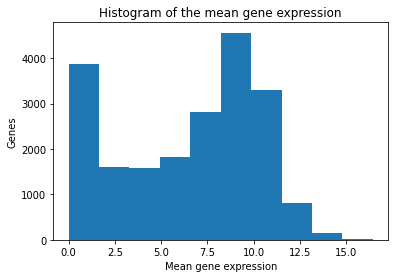

In [36]:
# 1.3) Plot a histogram of the mean gene expression with 10 bins.
df_copy = df.copy() # copying our data file not to cause any data loss
df_copy = df_copy.iloc[: , 1:] # delete first column because it describes patients
mean = df_copy.mean(axis=0)
plt.hist(mean, bins = 10)
plt.xlabel('Mean gene expression')
plt.ylabel('Genes')
plt.title('Histogram of the mean gene expression')
plt.show()

This histogram shows the means of gene expressions in x-axis and number of genes that has corresponding mean values in y-axis. When we add the numbers, we get the total genes in the dataset.

In [8]:
# 1.4) Which gene has the maximum mean expression? 
print("{} has the maximum mean expression with value {}".format(mean.idxmax(), mean.max()))

gene_230 has the maximum mean expression with value 16.430441642060657


In [9]:
# 1.5) How many unique cancers do we have in the dataset?
cancers = df2["Class"].value_counts(normalize=True)
cancerCount = len(cancers)
print("Number of unique cancers:",cancerCount)

Number of unique cancers: 5


PART 2: K-means Clustering 

K-means is a frequently used clustering algorithm which divides or partitions the data points into a predetermined, “k” number of clusters. In this part, we will pretend that we do not know the cancer labels
for the samples and cluster patients.

In [47]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

Silhouette Score for k=2: 0.1279887900401054
Silhouette Score for k=3: 0.1691453108916364
Silhouette Score for k=5: 0.2245794166357534
Silhouette Score for k=6: 0.22875604809637076
Silhouette Score for k=7: 0.1783415501038723
Silhouette Score for k=8: 0.14164147880710684
Silhouette Score for k=9: 0.13483982924338853


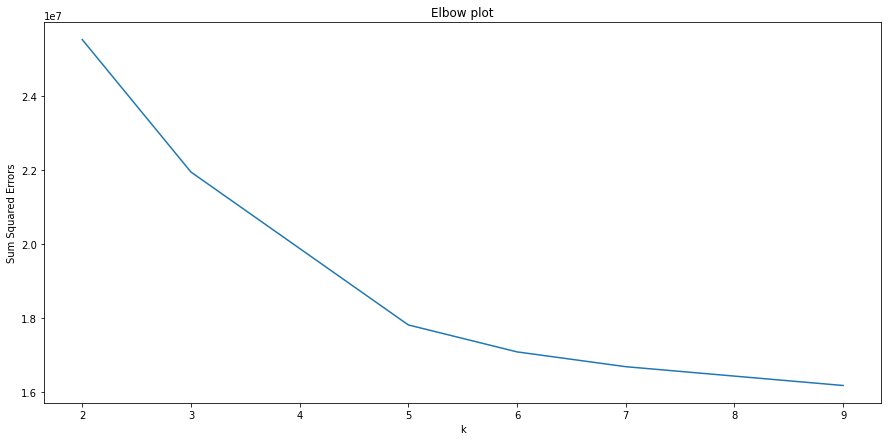

In [43]:
ssErrors = []
X = np.array(df_copy)
kValues = [2,3,5,6,7,8,9]
silList = []
for i in kValues:
  kmeans = KMeans(n_clusters=i, init= 'k-means++', random_state=1, n_init=5).fit(X)
  ssErrors.append(kmeans.inertia_)
  # Calculate silhouette score for k=2
  score = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')
  silList.append(score)
  print('Silhouette Score for k={}: {}'.format(i,score))
kmeans.labels_

# Generate the elbow plot
plt.figure(figsize=(15,7))
plt.plot([2,3,5,6,7,8,9],ssErrors)
plt.xlabel('k')
plt.ylabel('Sum Squared Errors')
plt.title('Elbow plot')
plt.show()

Best value of the elbow plot is 5

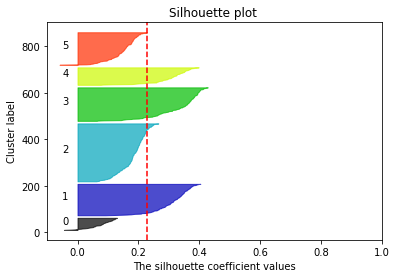

In [53]:
# Plot the silhouette width graph for the best value of k
plt.xlim([-0.1, 1])
clusterer = KMeans(n_clusters=6, random_state=1)
cluster_labels = clusterer.fit_predict(X)
sample_silhouette_values = silhouette_samples(X, cluster_labels)
y_lower = 10
for i in range(6):
  # Aggregate the silhouette scores for samples belonging to
  # cluster i, and sort them
  ith_cluster_silhouette_values = \
  sample_silhouette_values[cluster_labels == i]

  ith_cluster_silhouette_values.sort()

  size_cluster_i = ith_cluster_silhouette_values.shape[0]
  y_upper = y_lower + size_cluster_i

  color = cm.nipy_spectral(float(i) / 6)
  plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                    facecolor=color, edgecolor=color, alpha=0.7)

  # Label the silhouette plots with their cluster numbers at the middle
  plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

  # Compute the new y_lower for next plot
  y_lower = y_upper + 10  # 10 for the 0 samples
plt.title("Silhouette plot ")
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")
bestSil = max(silList)
# The vertical line for average silhouette score of all the values
plt.axvline(x=bestSil, color="red", linestyle="--")
plt.show()

Best k value is 5 and it matches with the number of cancers in our dataset.